# ⚒️ Mining Dickens ⚒️

## Import the texts

Let's first import the text of some novels. We'll use _Great Expectations_, _Oliver Twist_ and _David Copperfield_. Several out-of-copyright texts such as these can be freely downloaded from [Project Gutenberg](https://www.gutenberg.org), where you'll find also many non-English works if you'd like to experiment with your own texts.

In [1]:
with open('../inputs/data/greatexpectations.txt', 'r') as intxt:
    greatexpectations = intxt.read()

with open('../inputs/data/olivertwist.txt', 'r') as intxt:
    olivertwist = intxt.read()

with open('../inputs/data/davidcopperfield.txt', 'r') as intxt:
    davidcopperfield = intxt.read()

## Basic preprocessing

Now we start with the _preprocessing_ stage of text analysis - which is well-known to be time-consuming (and often more so than the analysis itself!). The next step needs to be bespoke for each of the files. For each text, we remove unwanted text that isn't part of the novel. To determine this you'll need to have a look at the individual files and establish which string can unequivocably be considered as the cut-off point for the beginning and end of the novel:

In [2]:
greatexpectations = greatexpectations.split(' Chapter LIX. AND LAST')[-1].strip()
greatexpectations = greatexpectations.split('*** END OF THE PROJECT GUTENBERG EBOOK GREAT EXPECTATIONS ***')[0].strip()

olivertwist = olivertwist.split('LIII     AND LAST')[-1].strip()
olivertwist = olivertwist.split('*** END OF THE PROJECT GUTENBERG EBOOK OLIVER TWIST ***')[0].strip()

davidcopperfield = davidcopperfield.split('THE PERSONAL HISTORY AND EXPERIENCE OF DAVID COPPERFIELD THE YOUNGER')[-1].strip()
davidcopperfield = davidcopperfield.split('*** END OF THE PROJECT GUTENBERG EBOOK DAVID COPPERFIELD ***')[0].strip()

We will now define a very simple function to clean the text from anything that's not a alphabetic character or a space. We will use the package [`re`]((https://docs.python.org/3/library/re.html)) to achieve this. **Reg**ular **ex**pressions (_regex_) can get very complex, but we'll stick to a few simple ones. To check more complex regex on the fly, I recommend [this website](https://regex101.com).

In [3]:
import re

In [4]:
def cleantxt(text):
    newtext = re.sub('-\n', '', text) # Remove linebreaks within words if they exist
    newtext = re.sub('\n', ' ', newtext) # Remove ordinary linebreaks
    newtext = re.sub(r'[^a-zA-Z\s]', ' ', str(newtext)) # Remove anything that is not a space or a letter
    return newtext

And let's apply the function to each text.

In [5]:
greatexpectations_clean = cleantxt(greatexpectations)
olivertwist_clean = cleantxt(olivertwist)
davidcopperfield_clean = cleantxt(davidcopperfield)

We now define a function for returning a set with all the unique _word forms_ in a text:

In [6]:
def get_unique_words(text):
    unique_vocab_set = {word.lower() for word in text.split()} # this splits on any whitespace, including tabs!
    unique_vocab_set.discard('') # in case any blank is left oer
    return unique_vocab_set

And apply that function:

In [7]:
greatexpectations_unique_words = get_unique_words(greatexpectations_clean)
olivertwist_unique_words = get_unique_words(olivertwist_clean)
davidcopperfield_unique_words = get_unique_words(davidcopperfield_clean)

Let's run a quick check of the number of unique words in each of the novels:

In [8]:
print('Number of unique words:')

print('Great Expectations:', len(greatexpectations_unique_words))
print('Oliver Twist:', len(olivertwist_unique_words))
print('David Copperfield:', len(davidcopperfield_unique_words))

Number of unique words:
Great Expectations: 10756
Oliver Twist: 10155
David Copperfield: 13880


Also keep in mind the size of the novels themselves:

In [9]:
print('Size of novels (after basic cleaning):')

print('Great Expectations:', len(greatexpectations_clean.split()))
print('Oliver Twist:', len(olivertwist_clean.split()))
print('David Copperfield:', len(davidcopperfield_clean.split()))

Size of novels (after basic cleaning):
Great Expectations: 188924
Oliver Twist: 161508
David Copperfield: 362878


We could visualize the words that the three novels have in common with a Venn diagram. We'll use one of the most popular packages for plotting with Python, [`matplotlib`](https://matplotlib.org). We'll also use [`matplotlib_venn`](https://pypi.org/project/matplotlib-venn/) for plotting Venn diagrams specifically. 

In [10]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

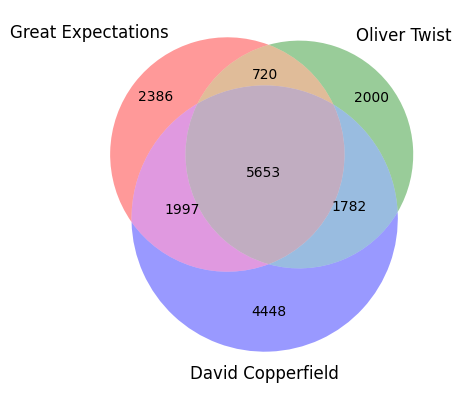

In [11]:
venn3([greatexpectations_unique_words, olivertwist_unique_words, davidcopperfield_unique_words], 
      ('Great Expectations', 'Oliver Twist', 'David Copperfield'))

plt.show()

Now, that was a very crude way of looking at common word forms in the three novels. In a real-world scenario, we probably want to check actual _vocabulary words_, i.e. **lemmata**, not any inflected form of the same lemma. We can do that with the help of one of several off-the-shelf tools for text processing in Python, e.g. `spaCy` and the Natural Language Toolkit (`nltk`). We'll use spaCy's pretrained English model.

In [12]:
import spacy
# !python -m spacy download en_core_web_sm # prepending "!" makes this run as a command line input
import en_core_web_sm
from spacy import displacy
nlp = en_core_web_sm.load()
nlp.max_length = 2000000 # default limit for spacy is 1M, but we need more than that. You can check the length of your text with len(text)

Now we have a spaCy model loaded, which we called `nlp`. In the spaCy [docs](https://spacy.io), you can find all the details on what you can achieve with a pretrained model. We will now test it out on a sample sentence first:

In [13]:
sample_sentence = "I can't wait to see what this lecture will teach me"

Let's run the sentence through the spaCy model:

In [14]:
sample_sentence = nlp(sample_sentence)

And visualize it with dispaCy:

In [15]:
options = {"compact": True, "distance": 80, "color": "yellow", "bg": "black"}

displacy.render(sample_sentence, style="dep",options=options)

We can now use the processed sentence to extract things like lemmata and part-of-speech:

In [16]:
for token in sample_sentence:
    print(token, (token.lemma_ + '_' + token.pos_))

I I_PRON
ca can_AUX
n't not_PART
wait wait_VERB
to to_PART
see see_VERB
what what_PRON
this this_DET
lecture lecture_NOUN
will will_AUX
teach teach_VERB
me I_PRON


Let's then run spaCy on the novels (this step will take a while!):

In [17]:
greatexpectations_nlp = nlp(greatexpectations_clean)
olivertwist_nlp = nlp(olivertwist_clean)
davidcopperfield_nlp = nlp(davidcopperfield_clean)

You can check that it worked on a random sentence of one of these:

In [18]:
for token in greatexpectations_nlp[25:45]:
    print(token, token.lemma_, token.pos_, token.dep_)

nothing nothing PRON dobj
longer long ADV advmod
or or CCONJ cc
more more ADV conj
explicit explicit ADJ acomp
than than ADP prep
Pip Pip PROPN pobj
    SPACE dep
So so ADV advmod
    SPACE dep
I I PRON nsubj
called call VERB ROOT
myself myself PRON dobj
Pip Pip PROPN oprd
    SPACE dep
and and CCONJ cc
came come VERB conj
to to PART aux
be be AUX auxpass
called call VERB advcl


Let's redefine the function for returning the vocabulary of the texts by including the processing through the spaCy model:

In [19]:
def get_vocab(text_nlp):
    vocab_set = {token.lemma_ + '_' + token.pos_ for token in text_nlp}
    vocab_set.discard('') # in case any blank is left over
    return vocab_set

And run the function on each spaCy-processed novel:

In [20]:
greatexpectations_vocab = get_vocab(greatexpectations_nlp)
olivertwist_vocab = get_vocab(olivertwist_nlp)
davidcopperfield_vocab = get_vocab(davidcopperfield_nlp)

Check the vocabulary size of each novel again:

In [21]:
print(len(greatexpectations_vocab))
print(len(olivertwist_vocab))
print(len(davidcopperfield_vocab))

10206
9476
13208


We can see that, naturally, the sizes have decreased after lemmatization. 

Let's visualize the intersections between their vocabularies once again:

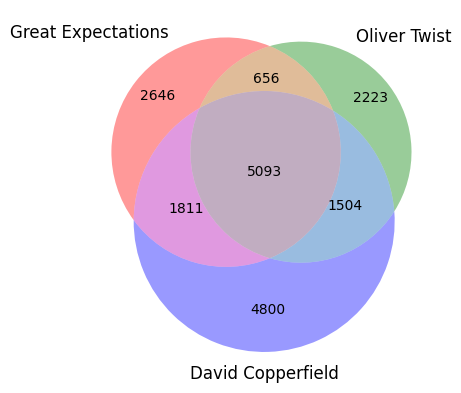

In [22]:
venn3([greatexpectations_vocab, olivertwist_vocab, davidcopperfield_vocab], 
      ('Great Expectations', 'Oliver Twist', 'David Copperfield'))

plt.show()

## Named entity recognition

We can try to identify the major characters of a novel with the help of a rather important NLP method called Named Entity Recognition (NER), which automatically identifies likely candidates for places, people and different categories of abstract and concrete objects (depending on the model). 

We'll stick to the English model that we have already fetched from spaCy to do this. Since we've already processed the novels with the spaCy model, we actually already have named entities identified in them. Let's have a look at a random sentence in one of the novels. We can use `displacy` to highlight entities in the cell output:

In [23]:
displacy.render(olivertwist_nlp[1300:1500], style="ent")

Next we are going to try and automatically identify the names of the major characters in each novel by using the named entities that have been categorized by spaCy as `PERSON`. We'll then count their occurrences in the texts, sort them by frequency and take the _n_ most frequent ones. Let's use `Counter` to count the occurrences and let's then organize the counts in a `dataframe` using the very popular data analysis package [`pandas`](https://pandas.pydata.org).

In [24]:
from collections import Counter
import pandas as pd
# pd.options.display.max_colwidth = 400

The following cell initializes an empty list which we call `people` and iterates over all identified entities in the novel (we'll try this out on _Oliver Twist_ first), which we can access using the `.ents` attribute and if the label of this attribute is `PERSON` we'll append it to the list `people`. We'll then perform a `Counter` on this list, sort them by frequency (with the Counter-built-in method `.most_common()`) and put the counts in a dataframe with two columns: `character` and `count` (i.e. how many times it appears in the text).

In [25]:
people = []

for named_entity in olivertwist_nlp.ents:
    if named_entity.label_ == "PERSON":
        people.append(named_entity.text)


people_count = Counter(people)

df_characters_olivertwist = pd.DataFrame(people_count.most_common(), columns=['character', 'count'])

Have a look at the top-20 identified people in _Oliver Twist_:

In [26]:
df_characters_olivertwist.head(20)

character  count
0            Oliver    624
1             Sikes    299
2             Fagin    204
3              Noah    107
4             Nancy     96
5              Bill     64
6           Grimwig     52
7         Mrs  Mann     51
8               Don     51
9        Sowerberry     47
10      Mrs  Maylie     45
11         Oliver s     44
12     Oliver Twist     43
13          Charley     41
14    Charley Bates     36
15     Master Bates     34
16      Mrs  Corney     34
17  Mrs  Sowerberry     33
18           Barney     27
19              Jew     26

Let's do the same for the other two novels:

In [27]:
# Great Expectations
people = []
for named_entity in greatexpectations_nlp.ents:
    if named_entity.label_ == "PERSON":
        people.append(named_entity.text)
people_count = Counter(people)
df_characters_greatexpectations = pd.DataFrame(people_count.most_common(), columns=['character', 'count'])

# David Copperfield
people = []
for named_entity in davidcopperfield_nlp.ents:
    if named_entity.label_ == "PERSON":
        people.append(named_entity.text)
people_count = Counter(people)
df_characters_davidcopperfield = pd.DataFrame(people_count.most_common(), columns=['character', 'count'])

Have a look that it worked:

In [28]:
df_characters_greatexpectations.head(10)

character  count
0       Joe    605
1   Herbert    272
2  Havisham    263
3   Wemmick    215
4   Estella    100
5    Provis     62
6    Wopsle     59
7  Mrs  Joe     53
8       Don     48
9     Biddy     39

In [29]:
df_characters_davidcopperfield.head(10)

character  count
0            Dora    421
1     Copperfield    410
2      Steerforth    282
3            Dick    214
4           Uriah    171
5       Wickfield    169
6  Miss Murdstone    154
7             Jip     95
8        Traddles     88
9      Mrs  Crupp     88

We can now use these characters for a variety of tasks, including the very practical one of removing so-called _stop words_ (see next).

## Word frequencies

A useful first exploratory step, beside looking at the size of vocabulary, is checking the most frequently occurring words in each of the novels. However, definitely not all words informative---removing so-called **stop words** from the text, before perfoming this type of exploratory analysis, is a crucial step to avoid getting useless noise. Stop words are words occurring extremely frequently in a text and are mostly functional words, such as _is_, _not_, _and_, _to_. Let's start by removing those from the texts before checking the most frequent words.

The list of stop words we will use was compiled by [Google](https://code.google.com/archive/p/stop-words/) in 2011. Quite dated if you plan to use it on contemporary data, but since it's Dickens, it's the most complete you will probably find.

Let's first import the Google stop words and put them in a `list`:

In [30]:
google_stopwords = []
with open('../inputs/google-stopwords.txt') as intxt:
    for word in intxt.readlines():
        google_stopwords.append(word.strip())

In [31]:
google_stopwords[1:20]

['about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

Let's import the stopwords for English and add the name of the characters found via NER in the previous section (we don't want them to figure among the most frequent words!). Since named entities can also be phrases like _Miss Murdstone_, we will first split any phrase into its components, so that, both _Miss_ and _Murdstone_ will be considered as separate stopwords. Since not all identified `PERSON`-type entities will in fact be characters, we'll only consider the first 50 for each novel. Also, we will work with lowercased words, since any count method will count, e.g., character and CHARACTER as two separate lemmata, even though they are in fact the same. 

In [32]:
allcharacters = list(df_characters_davidcopperfield['character'][:50]) + list(df_characters_olivertwist['character'][:50]) + list(df_characters_greatexpectations['character'][:50])

dickensstopwords = []

for character in allcharacters:
    character = character.lower()
    character = character.split(' ') # the result is a list, so we ADD it to the existing list
    dickensstopwords = dickensstopwords + character

# Let's add the stopwords from Google to our character list
dickensstopwords = google_stopwords + dickensstopwords
dickensstopwords = list(dict.fromkeys(dickensstopwords))

We now want to have a look at the most frequent words in each novel to check whether they can tell us anything interesting (and just because it's fun). Again, we don't want to look at every inflected form of a lemma, but at the frequency of the lemmata themselves. 

Let's first lemmatize the whole text of each novel:

In [33]:
greatexpectations_lemmatized = " ".join([token.lemma_ for token in greatexpectations_nlp])
olivertwist_lemmatized = " ".join([token.lemma_ for token in olivertwist_nlp])
davidcopperfield_lemmatized = " ".join([token.lemma_ for token in davidcopperfield_nlp])

Have a look at the lemmatize texts:

In [34]:
greatexpectations_lemmatized[0:500]

'chapter I     my father s family name be Pirrip   and my christian name Philip   my infant tongue could make of both name nothing long or more explicit than Pip   so   I call myself Pip   and come to be call Pip    I give Pirrip as my father s family name   on the authority of his tombstone and my sister   Mrs   Joe Gargery   who marry the blacksmith   as I never see my father or my mother   and never see any likeness of either of they   for their day be long before the day of photograph    my f'

From the lemmatize text, let's now remove the stopword list we created and lower case the text. We can write a little function for this:

In [35]:
def removestopwords(text,stopword_list):
    text_nostopwords = ' '.join([word.lower() for word in text.split() if word.lower() not in stopword_list])
    return text_nostopwords

Apply the function to the lemmatized texts:

In [36]:
greatexpectations_nostopwords = removestopwords(greatexpectations_lemmatized,dickensstopwords)
olivertwist_nostopwords = removestopwords(olivertwist_lemmatized,dickensstopwords)
davidcopperfield_nostopwords = removestopwords(davidcopperfield_lemmatized,dickensstopwords)

Have a look at the text without stopwords:

In [37]:
davidcopperfield_nostopwords

'chapter bear turn hero life station hold life life record bear inform friday clock night remark clock strike simultaneously consideration birth declare nurse sage woman neighbourhood lively month possibility personally acquaint destine unlucky life privileged ghost spirit gift inevitably attach unlucky infant gender bear small friday night head history prediction verify falsify result branch remark inheritance baby complain property enjoyment heartily bear caul advertise sale newspaper price guinea sea people short money short faith preferred cork jacket solitary bidding attorney connect broke business offer pound cash balance sherry decline guarantee drown high bargain advertisement withdraw dead loss sherry poor mother sherry market year caul raffle country fifty member crown head winner spend shilling remember feel uncomfortable confused dispose caul win recollect lady hand basket reluctantly produce stipulate shilling halfpence twopence halfpenny short immense waste arithmetic end

Let's now have a quick look at the most frequent words in each novel through [word clouds](https://en.wikipedia.org/wiki/Tag_cloud):

Great Expectations:


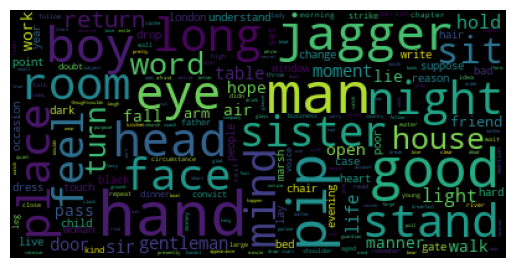

Oliver Twist:


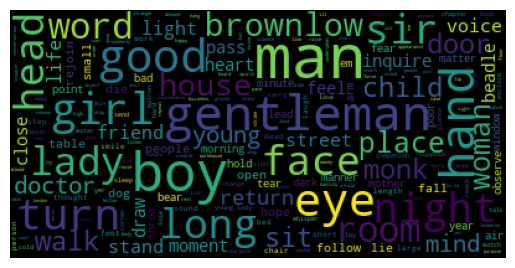

David Copperfield:


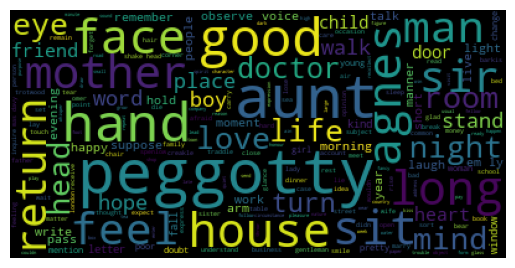

In [38]:
from wordcloud import WordCloud

print('Great Expectations:')
wordcloud = WordCloud(max_font_size=50).generate(greatexpectations_nostopwords)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('Oliver Twist:')
wordcloud = WordCloud(max_font_size=50).generate(olivertwist_nostopwords)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('David Copperfield:')
wordcloud = WordCloud(max_font_size=50).generate(davidcopperfield_nostopwords)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

There are all sorts of things in there. Thanks to the NLProcessed text, we could look at the most frequent words by PoS. We can check, for example, the most frequent verbs and adjectives. Let's only take the verbs first:

In [39]:
greatexpectations_verbs = " ".join([token.lemma_ for token in greatexpectations_nlp if token.pos_ == 'VERB'])
olivertwist_verbs = " ".join([token.lemma_ for token in olivertwist_nlp if token.pos_ == 'VERB'])
davidcopperfield_verbs = " ".join([token.lemma_ for token in davidcopperfield_nlp if token.pos_ == 'VERB'])

In [40]:
greatexpectations_verbs[0:500]

'make call come call give marry see see regard derive give draw freckle sickly arrange give try get live entertain bear pocket take wound seem gain find overgrow bury bury intersect scatter feed rush grow begin cry hold cry start keep cut tie soak smother cut sting tear limp shiver glare growl chatter seize cut plead pray do tell say say stare give show live say pint point lie pollard look turn empty be come make go see come say seat eat say lick cheek get believe darn couldn eat say han express '

Let's again remove uninteresting words (stopwords):

In [41]:
greatexpectations_verbs = removestopwords(greatexpectations_verbs,dickensstopwords)
olivertwist_verbs = removestopwords(olivertwist_verbs,dickensstopwords)
davidcopperfield_verbs = removestopwords(davidcopperfield_verbs,dickensstopwords)

And generate new word clouds:

Great Expectations:


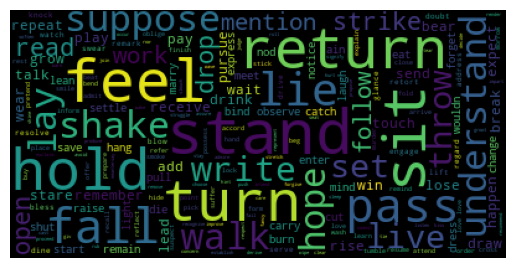

Oliver Twist:


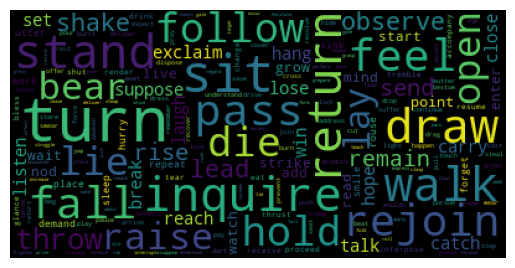

David Copperfield:


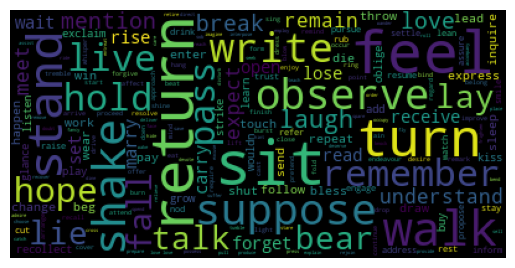

In [42]:
from wordcloud import WordCloud

print('Great Expectations:')
wordcloud = WordCloud(max_font_size=50).generate(greatexpectations_verbs)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('Oliver Twist:')
wordcloud = WordCloud(max_font_size=50).generate(olivertwist_verbs)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('David Copperfield:')
wordcloud = WordCloud(max_font_size=50).generate(davidcopperfield_verbs)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Let's try the same with adjectives:

In [43]:
greatexpectations_adjectives = " ".join([token.lemma_ for token in greatexpectations_nlp if token.pos_ == 'ADJ'])
olivertwist_adjectives = " ".join([token.lemma_ for token in olivertwist_nlp if token.pos_ == 'ADJ'])
davidcopperfield_adjectives = " ".join([token.lemma_ for token in davidcopperfield_nlp if token.pos_ == 'ADJ'])

greatexpectations_adjectives = removestopwords(greatexpectations_adjectives,dickensstopwords)
olivertwist_adjectives = removestopwords(olivertwist_adjectives,dickensstopwords)
davidcopperfield_adjectives = removestopwords(davidcopperfield_adjectives,dickensstopwords)

In [44]:
greatexpectations_adjectives[0:500]

'christian explicit odd square stout dark curly black childish long neat sacred universal indebted marsh vivid broad memorable raw bleak dead dead dark flat distant small afraid terrible fearful coarse broken lamed sudden high young fat undersized threatening tight short giddy upright sick tremendous upright fearful small young young young young secret young warm comfortable safe young open young young broken dead young goo good cold flat green young dead stiff good sore heavy long black horizont'

Great Expectations:


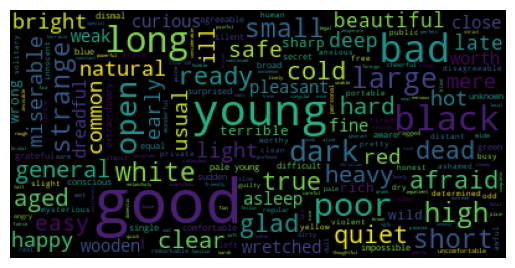

Oliver Twist:


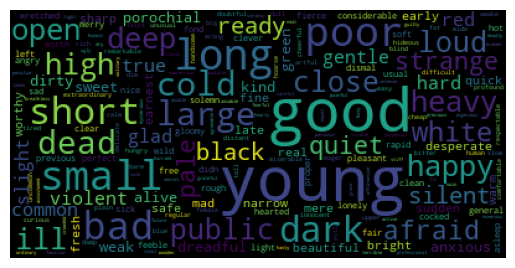

David Copperfield:


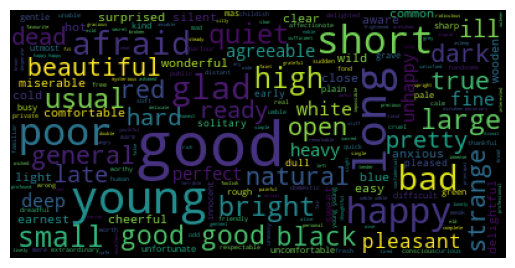

In [45]:
from wordcloud import WordCloud

print('Great Expectations:')
wordcloud = WordCloud(max_font_size=50).generate(greatexpectations_adjectives)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('Oliver Twist:')
wordcloud = WordCloud(max_font_size=50).generate(olivertwist_adjectives)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

print('David Copperfield:')
wordcloud = WordCloud(max_font_size=50).generate(davidcopperfield_adjectives)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Sentiment analysis

[Sentiment analysis]() helps automatically identify and quantify the emotional tone in a text or the subjective attitude towards the particular topic being narrated or discussed or with respect to a given statement. It's a complex topic, with many downstream applications (particularly in marketing and social media opinion mining) - we will only get a taste of what it looks like and what it can do on literary text.

We'll use the _Valence Aware Dictionary and sEntiment Reasoner_ ([VADER](https://pypi.org/project/vaderSentiment/)) tool, which is actually specifically fine-tuned to social media sentiments, but has been used on a variety of texts from other domains.

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# pd.options.display.max_colwidth = 400
import warnings # suppress warnings because they are not relevant for us here
warnings.simplefilter(action='ignore', category=FutureWarning)
import nltk

We first initialize the sentiment analyser:

In [47]:
sentimentAnalyser = SentimentIntensityAnalyzer()

Let's try out on one intuitively positive and one negative sentence:

In [48]:
print(sentimentAnalyser.polarity_scores("This lecture is super useful!"))
print(sentimentAnalyser.polarity_scores("This lecture is freaking rubbish!"))

{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'compound': 0.7959}
{'neg': 0.436, 'neu': 0.564, 'pos': 0.0, 'compound': -0.4753}


The analyser spits out 4 metrics:
- `neg`: measure of negative attitude/opinion/sentiment
- `neu`: measure of neutral attitude/opinion/sentiment
- `pos`: measure of positive attitude/opinion/sentiment
- `compound`: compound overall measure of sentiment

What we're generally interested in is the _compound measure_. It ranges between `-1` and `1`. The closer to `0` the more neutral the score will be. The closer to `-1` the more negative and the closer to `1` the more positive it will be.

We can now try it on one of the novels. We will use individual sentences and chapters as units to try and capture the overall sentiment curve in the novels, but in other scenarios you could use time stamps/chunks of different types depending on your research goals! Let's try it on Oliver Twist again.

Let's first identify the chapters:

In [49]:
pattern = r'CHAPTER [IVXL]+'

And split the text into them:

In [50]:
olivertwist_chapters = re.split(pattern, olivertwist)[1:]

Let's initilize a dataframe with three columns: 1. Chapter number 2. Text of the chapter 3. Compound sentiment score.

We'll iterate over each chapter, split it into sentences, assign a sentiment score to each sentecne in order and append a new row corresponding to the sentences to the dataframe in a loop.

The following should take around 2 minutes:

In [51]:
df_sentiment = pd.DataFrame(columns=['chapter', 'text','sentiment_score'])

for index, chapter in enumerate(olivertwist_chapters): # any Roman numeral repeated any amount of times
    sentences = nltk.sent_tokenize(chapter)
    for sentence in sentences:
        sentiment_score = sentimentAnalyser.polarity_scores(sentence)
        sentence_series = pd.Series([index+1, sentence.strip(),sentiment_score['compound']], index=['chapter', 'text','sentiment_score'])
        df_sentiment = df_sentiment.append(sentence_series,ignore_index=True)

Let's have look at the results. Check the 10 most negative sentences:

In [52]:
df_sentiment.sort_values(by='sentiment_score')[:10]

chapter                                               text  \
3547      30  if when we oppress and grind our\nfellow-creat...   
5624      47  Mortification at the overthrow of his notable ...   
5986      49  Those proofs were destroyed by you, and now, i...   
2396      20  Here, he read of\ndreadful crimes that made th...   
3047      26  Cunning, ferocity, and drunkeness in all its s...   
1785      15  Mind him!”\n\nWeak with recent illness; stupif...   
4746      40  The miserable companion of thieves and ruffian...   
615        6  But his spirit was roused\nat last; the cruel ...   
45         2  Unfortunately for the experimental philosophy ...   
196        3  He only cried bitterly all\nday; and, when the...   

      sentiment_score  
3547          -0.9894  
5624          -0.9840  
5986          -0.9763  
2396          -0.9716  
3047          -0.9667  
1785          -0.9656  
4746          -0.9646  
615           -0.9620  
45            -0.9618  
196           -0.9612

And the 10 most positive ones:

In [53]:
df_sentiment.sort_values(by='sentiment_score')[-10:]

chapter                                               text  \
6549      53  I would paint\nher the life and joy of the fir...   
4074      34  Above stairs, the remainder of the evening pas...   
1120      11  There\nwere the faces of friends, and foes, an...   
1563      14  The persons on whom I have bestowed my\ndeares...   
3202      27  ATONES FOR THE UNPOLITENESS OF A FORMER CHAPTE...   
4192      35  As we have met\nto-day, we meet no more; but i...   
3455      29  The very\nintelligence that shone in her deep ...   
4633      39  It’s near ten, and nothing done yet.”\n\nIn ob...   
3730      32  But, at length, he began, by slow degrees, to ...   
1351      12  A\nweakness on his part, which affords the nar...   

      sentiment_score  
6549           0.9845  
4074           0.9851  
1120           0.9853  
1563           0.9854  
3202           0.9855  
4192           0.9864  
3455           0.9873  
4633           0.9885  
3730           0.9925  
1351           0.9956

We can now visualize the sentiment curve in _Oliver Twist_. 

Instead of visualizing the score for every single sentence in the novel we will use the average over a rolling window. Pandas `rolling` makes calculations for each observation in a specified column based on a rolling window. For example, if we wanted to look at the overall sentiment curve in a novel, we might want to visualise it _not_ using the sentiment score for each sentence, since this varies wildly from one to the next, but by normalizing the sentiment score for a particular sentence to the average sentiment score of surrounding sentences. The number of surrounding sentences before and after is the _rolling window_. The higher the window, in our case, the more we will capture sentiment over a longer stretch of the novel. Say we decide to compare a rolling window of 100, 500, 1000 and plot the sentiment score in _Oliver Twist_ based on this. 

Let's first add a column for each of these windows:

In [54]:
df_sentiment['sc_100'] = df_sentiment.rolling(100)['sentiment_score'].mean()
df_sentiment['sc_500'] = df_sentiment.rolling(500)['sentiment_score'].mean()
df_sentiment['sc_1000'] = df_sentiment.rolling(1000)['sentiment_score'].mean()

Now let's plot the rolling scores in the same figure, so we can compare them:

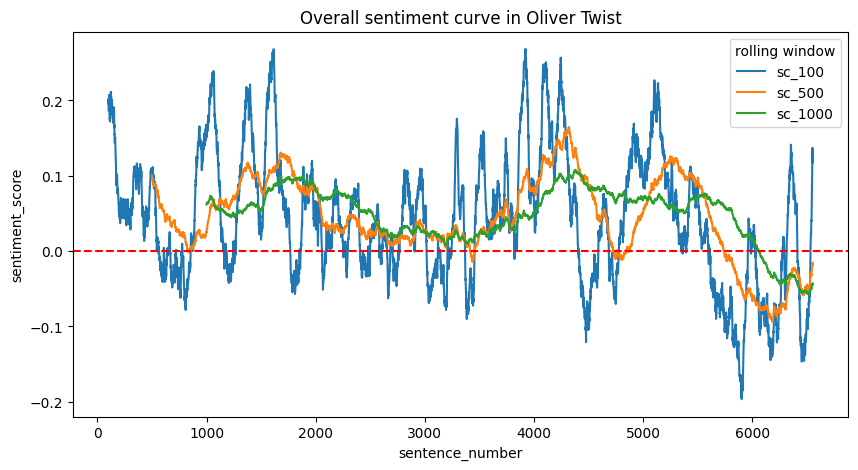

In [55]:
df_sentiment.plot(y=['sc_100','sc_500','sc_1000'],kind='line',figsize=(10,5))
plt.title('Overall sentiment curve in Oliver Twist')
plt.xlabel('sentence_number')
plt.ylabel('sentiment_score')
plt.legend(title='rolling window')
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

Obviously, for each rolling window of _n_ size, the first _n_ sentences will have a value, since we don't have enough observations before them to calculate the mean score. We can adjust this by adding a `min_periods` option, which will run the calculations on the window of _n_ values if available, otherwise it will do so anyway down to the number specified in `min_periods`. We could adjust this value over multiple trials, but perhaps a more systematic way of doing it could be to set `min_periods` to the number corresponding to the lowest number of sentences a chapter in Oliver Twist has: 

In [56]:
df_sentiment['sc_100'] = df_sentiment.rolling(100,min_periods=1)['sentiment_score'].mean()
df_sentiment['sc_500'] = df_sentiment.rolling(500,min_periods=50)['sentiment_score'].mean()
df_sentiment['sc_1000'] = df_sentiment.rolling(1000,min_periods=100)['sentiment_score'].mean()

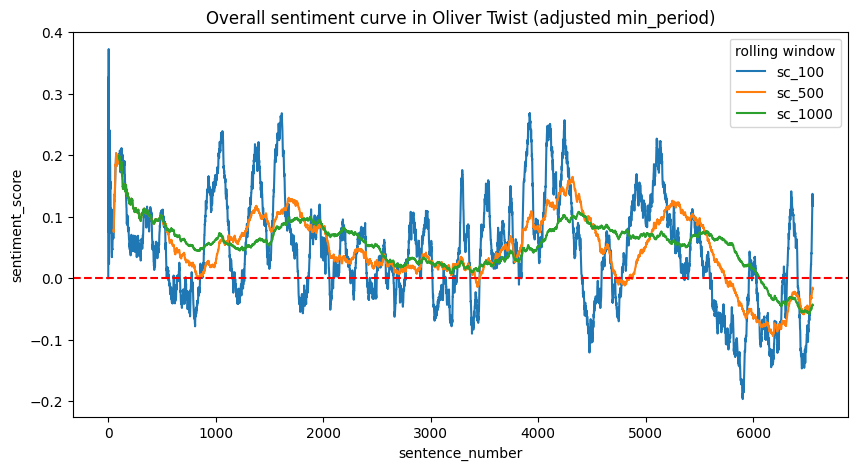

In [57]:
df_sentiment.plot(y=['sc_100','sc_500','sc_1000'],kind='line',figsize=(10,5))
plt.title('Overall sentiment curve in Oliver Twist (adjusted min_period)')
plt.xlabel('sentence_number')
plt.ylabel('sentiment_score')
plt.legend(title='rolling window')
plt.axhline(y=0, color='red', linestyle='--')


We can have a look at the sentiment chapter by chapter as well:

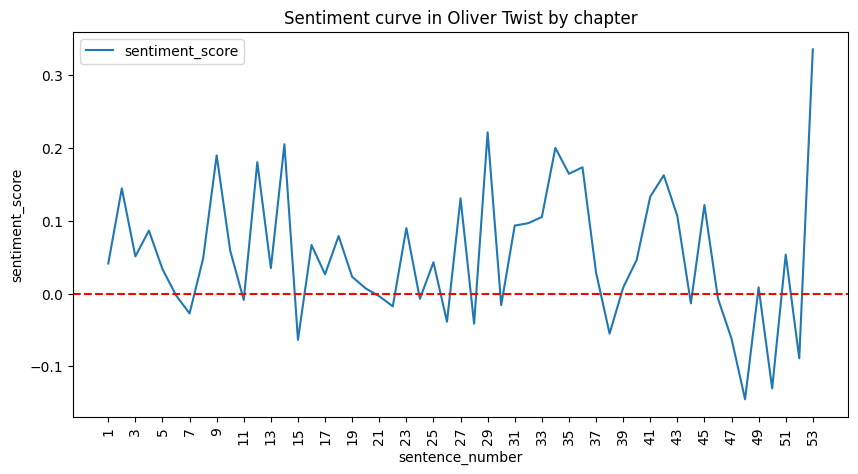

In [58]:
chapters = list(dict.fromkeys(list(df_sentiment['chapter'])))
df_sentiment.groupby('chapter')['sentiment_score'].mean().plot(legend=True,x='chapter', y='sentiment_score',xticks=chapters[::2],rot=90,figsize=(10,5))

plt.title('Sentiment curve in Oliver Twist by chapter')

plt.xlabel('sentence_number')
plt.ylabel('sentiment_score')
plt.axhline(y=0, color='red', linestyle='--')


We can see that there's a (possibly _way too_) sudden change in sentiment in the final chapter. Either the novel has a sudden final spike in overall sentiment score, or perhaps there's something about its text that doesn't make it comparable straightforwardly with the rest. Perhaps number of words? Let's compare the word counts of each chapter:

In [59]:
for chapter in chapters:
    count = 0
    for sentence in df_sentiment[df_sentiment['chapter'] == chapter]['text']:
        count += len(sentence.split())

    print(f'Word count for Ch. {chapter}:', count)

Word count for Ch. 1: 1110
Word count for Ch. 2: 3926
Word count for Ch. 3: 3076
Word count for Ch. 4: 2560
Word count for Ch. 5: 4013
Word count for Ch. 6: 1717
Word count for Ch. 7: 2314
Word count for Ch. 8: 3212
Word count for Ch. 9: 2321
Word count for Ch. 10: 1797
Word count for Ch. 11: 2606
Word count for Ch. 12: 3410
Word count for Ch. 13: 2798
Word count for Ch. 14: 3958
Word count for Ch. 15: 2341
Word count for Ch. 16: 3516
Word count for Ch. 17: 3196
Word count for Ch. 18: 2978
Word count for Ch. 19: 3393
Word count for Ch. 20: 2978
Word count for Ch. 21: 2163
Word count for Ch. 22: 2459
Word count for Ch. 23: 2700
Word count for Ch. 24: 1976
Word count for Ch. 25: 2231
Word count for Ch. 26: 4486
Word count for Ch. 27: 2478
Word count for Ch. 28: 3405
Word count for Ch. 29: 1374
Word count for Ch. 30: 2336
Word count for Ch. 31: 3931
Word count for Ch. 32: 3346
Word count for Ch. 33: 3276
Word count for Ch. 34: 3691
Word count for Ch. 35: 2801
Word count for Ch. 36: 984
Wo

## Topic modelling

Topic modelling is an unsupervised machine learning technique to extract hidden topics from body of texts. It's a complex issue, so, just like with sentiment analysis, we will only get a very superficial taste here, for you to be aware of this method, what tools exist out there to carry out topic modelling, and what inputs and outputs look like. The most popular algorithm for topic modelling is called Latent Dirichlet Allocation (LDA) and we will use the implementation in Python's [Gensim package](https://radimrehurek.com/gensim/intro.html#).

Simply put, LDA represents topics as word-cluster probabilities based on their co-occurrence in a document. Word co-occurrence in a text is a simple but crucial concept for many text mining tasks, so keep that in mind. This means that what LDA returns is lists of words, which you can then interpret as a coherent topic, if possible.

Let's start by importing the necessary libraries as usual. Beside `gensim` we will use `pyLDAvis` to visualize the topics for ease of interpretation.

In [60]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

Let's first create a dataframe, with one chapter per row:

In [61]:
olivertwist_chapters = pd.DataFrame({'text': olivertwist_chapters})

As usual, we first have to preprocess our corpus. We will provide lemmata, rather than word forms, and we will remove stopwords as well as some PoS which will unlikely be informative regarding topics. Unlike what we did before, we might not want to include character names as stopwords. At this stage, you may want to use topic modelling to identify which chapters concern a particular character more than others. 

Also, `ldamodel` from Gensim takes two main inputs: 
- a `dictionary`: this is a list of all words in our corpus (i.e. a tokenized corpus) with a unique ID assigned to each of them. This is used to determine the vocabulary size and for topic printing.
- a `bow` (bag-of-word) corpus

Let's first start by tokenizing and lemmatizing the corpus and removing stopwords:

In [62]:
pos_toremove = ['PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
olivertwist_chapters_tok = []

for chapter in nlp.pipe(olivertwist_chapters['text']):
    chapter = [token.lemma_.lower() for token in chapter if token.pos_ not in pos_toremove and token.lemma_.lower() not in google_stopwords and token.is_alpha]
    olivertwist_chapters_tok.append(chapter)

Have a look at the tokenized, lemmatized chapters with stopwords removed:

In [63]:
olivertwist_chapters['tokens'] =  olivertwist_chapters_tok
olivertwist_chapters

text  \
0   .\nTREATS OF THE PLACE WHERE OLIVER TWIST WAS ...   
1   .\nTREATS OF OLIVER TWIST’S GROWTH, EDUCATION,...   
2   .\nRELATES HOW OLIVER TWIST WAS VERY NEAR GETT...   
3   .\nOLIVER, BEING OFFERED ANOTHER PLACE, MAKES ...   
4   .\nOLIVER MINGLES WITH NEW ASSOCIATES. GOING T...   
5   .\nOLIVER, BEING GOADED BY THE TAUNTS OF NOAH,...   
6   .\nOLIVER CONTINUES REFRACTORY\n\n\nNoah Clayp...   
7   .\nOLIVER WALKS TO LONDON. HE ENCOUNTERS ON TH...   
8   .\nCONTAINING FURTHER PARTICULARS CONCERNING T...   
9   .\nOLIVER BECOMES BETTER ACQUAINTED WITH THE C...   
10  .\nTREATS OF MR. FANG THE POLICE MAGISTRATE; A...   
11  .\nIN WHICH OLIVER IS TAKEN BETTER CARE OF THA...   
12  .\nSOME NEW ACQUAINTANCES ARE INTRODUCED TO TH...   
13  .\nCOMPRISING FURTHER PARTICULARS OF OLIVER’S ...   
14  .\nSHOWING HOW VERY FOND OF OLIVER TWIST, THE ...   
15  .\nRELATES WHAT BECAME OF OLIVER TWIST, AFTER ...   
16  .\nOLIVER’S DESTINY CONTINUING UNPROPITIOUS, B...   
17  .\nHOW OLIVER PASSED HIS TIME IN THE IMPROVING...   
18  .\nIN WHICH A NOTABLE PLAN IS DISCUSSED AND DE...   
19  .\nWHEREIN OLIVER IS DELIVERED OVER TO MR. WIL...   
20  .\nTHE EXPEDITION\n\n\nIt was a cheerless morn...   
21  .\nTHE BURGLARY\n\n\n“Hallo!” cried a loud, ho...   
22  .\nWHICH CONTAINS THE SUBSTANCE OF A PLEASANT ...   
23  .\nTREATS ON A VERY POOR SUBJECT. BUT IS A SHO...   
24  .\nWHEREIN THIS HISTORY REVERTS TO MR. FAGIN A...   
25  .\nIN WHICH A MYSTERIOUS CHARACTER APPEARS UPO...   
26  .\nATONES FOR THE UNPOLITENESS OF A FORMER CHA...   
27  .\nLOOKS AFTER OLIVER, AND PROCEEDS WITH HIS A...   
28  .\nHAS AN INTRODUCTORY ACCOUNT OF THE INMATES ...   
29  .\nRELATES WHAT OLIVER’S NEW VISITORS THOUGHT ...   
30  .\nINVOLVES A CRITICAL POSITION\n\n\n“Who’s th...   
31  .\nOF THE HAPPY LIFE OLIVER BEGAN TO LEAD WITH...   
32  .\nWHEREIN THE HAPPINESS OF OLIVER AND HIS FRI...   
33  .\nCONTAINS SOME INTRODUCTORY PARTICULARS RELA...   
34  .\nCONTAINING THE UNSATISFACTORY RESULT OF OLI...   
35  .\nIS A VERY SHORT ONE, AND MAY APPEAR OF NO G...   
36  .\nIN WHICH THE READER MAY PERCEIVE A CONTRAST...   
37  .\nCONTAINING AN ACCOUNT OF WHAT PASSED BETWEE...   
38  .\nINTRODUCES SOME RESPECTABLE CHARACTERS WITH...   
39  .\nA STRANGE INTERVIEW, WHICH IS A SEQUEL TO T...   
40  .\nCONTAINING FRESH DISCOVERIES, AND SHOWING T...   
41  .\nAN OLD ACQUAINTANCE OF OLIVER’S, EXHIBITING...   
42  .\nWHEREIN IS SHOWN HOW THE ARTFUL DODGER GOT ...   
43  .\nTHE TIME ARRIVES FOR NANCY TO REDEEM HER PL...   
44  .\nNOAH CLAYPOLE IS EMPLOYED BY FAGIN ON A SEC...   
45  .\nTHE APPOINTMENT KEPT\n\n\nThe church clocks...   
46  .\nFATAL CONSEQUENCES\n\n\nIt was nearly two h...   
47  .\nTHE FLIGHT OF SIKES\n\n\nOf all bad deeds t...   
48  .\nMONKS AND MR. BROWNLOW AT LENGTH MEET. THEI...   
49  .\nTHE PURSUIT AND ESCAPE\n\n\nNear to that pa...   
50  .\nAFFORDING AN EXPLANATION OF MORE MYSTERIES ...   
51  .\nFAGIN’S LAST NIGHT ALIVE\n\n\nThe court was...   
52  .\nAND LAST\n\n\nThe fortunes of those who hav...   

                                               tokens  
0   [treats, place, oliver, twist, bear, circumsta...  
1   [treats, oliver, twist, growth, education, boa...  
2   [relate, oliver, twist, place, sinecure, week,...  
3   [oliver, offer, place, entry, public, life, fa...  
4   [oliver, mingles, associates, funeral, forms, ...  
5   [oliver, goaded, taunt, noah, rous, action, as...  
6   [oliver, continues, refractory, noah, claypole...  
7   [oliver, walks, london, encounter, road, stran...  
8   [concern, pleasant, gentleman, hopeful, pupils...  
9   [oliver, acquainted, character, associate, pur...  
10  [treats, fang, police, magistrate, furnishes, ...  
11  [oliver, care, narrative, reverts, merry, gent...  
12  [acquaintances, introduce, intelligent, reader...  
13  [comprise, oliver, stay, brownlow, remarkable,...  
14  [fond, oliver, twist, merry, jew, nancy, obscu...  
15  [relate, oliver, twist, claimed, nancy, narrow...  
16  [oliver, desti

We can now use this to generate a `Dictionary()` object:

In [64]:
dictionary = Dictionary(olivertwist_chapters['tokens'])

Which looks like this:

In [65]:
# print(dictionary.token2id)

Let's now generate a BOW for each chapter, as per the second requirement of `LdaModel`:

In [66]:
corpus = [dictionary.doc2bow(doc) for doc in olivertwist_chapters['tokens']]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 4),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 3),
  (28, 1),
  (29, 1),
  (30, 3),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 8),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 3),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 3),
  (91, 2)

We can now train the model. We'll stick to `5` topics, but in an actual research scenario you would want to try a few values there as a form of hyperparameter optimization:

In [67]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=200, random_state=56789,minimum_probability=0.6)

These are the topics:

In [68]:
lda_model.print_topics(num_words=30)


[(0,
  '0.017*"brownlow" + 0.009*"monks" + 0.007*"rose" + 0.006*"friend" + 0.006*"young" + 0.006*"man" + 0.005*"father" + 0.005*"child" + 0.004*"gentleman" + 0.004*"word" + 0.004*"brother" + 0.004*"return" + 0.004*"year" + 0.003*"remain" + 0.003*"heart" + 0.003*"girl" + 0.003*"long" + 0.003*"grimwig" + 0.003*"monk" + 0.003*"door" + 0.003*"face" + 0.003*"hand" + 0.003*"mother" + 0.002*"die" + 0.002*"maylie" + 0.002*"room" + 0.002*"love" + 0.002*"boy" + 0.002*"place" + 0.002*"secret"'),
 (1,
  '0.019*"bumble" + 0.015*"oliver" + 0.008*"boy" + 0.007*"man" + 0.006*"gentleman" + 0.006*"woman" + 0.006*"good" + 0.005*"hand" + 0.005*"sowerberry" + 0.005*"giles" + 0.005*"eye" + 0.005*"head" + 0.005*"door" + 0.004*"sir" + 0.004*"lady" + 0.004*"corney" + 0.004*"young" + 0.004*"noah" + 0.004*"matron" + 0.004*"beadle" + 0.004*"turn" + 0.003*"child" + 0.003*"face" + 0.003*"monks" + 0.003*"room" + 0.003*"long" + 0.003*"walk" + 0.003*"undertaker" + 0.003*"die" + 0.003*"place"'),
 (2,
  '0.016*"jew" + 0

Let's now display the topics of the novel with `lda_display`:

In [69]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

As expected, keeping the characters, rather than removing them as stopwords, allows us to use them as 'topics'! This way we could use them to roughly identified which chapters deal with a particular group of characters/character interactions.

We get 1 main topic for _Fagin_’s gang (**Topic 3**), 1 for _Bumble_ and _Sowerberry_ (earliest in Oliver’s story) (**Topic 2**), 1 for the _Maylies_ and _Brownlow_ (**Topic 4**).  We see that some characters are split across different topics, since their storylines are crossed at various points in the novel: the Brownlow-Rose-Monks storyline, and the discovery that Monks is Oliver’s half brother, for example, seems to be represented by Topic 1. We also see that _Noah_, for example, is roughly split between 2 topics, one clustering with Fagin’s gang, the other with Sowerberry. This also makes sense: Noah goes from being Sowerberry’s apprentice to a member of Fagin’s gang.

Let's add the identified topics to our by-chapter dataframe, so that we can group chapters depending on their main topic:

In [70]:
topics_column = []

for index, row in olivertwist_chapters.iterrows():
    try:
        topics_column.append(lda_model[corpus][index][0][0] + 1)
    except IndexError:
        topics_column.append('No topic')

olivertwist_chapters['topic_n'] = topics_column

In [71]:
olivertwist_chapters

text  \
0   .\nTREATS OF THE PLACE WHERE OLIVER TWIST WAS ...   
1   .\nTREATS OF OLIVER TWIST’S GROWTH, EDUCATION,...   
2   .\nRELATES HOW OLIVER TWIST WAS VERY NEAR GETT...   
3   .\nOLIVER, BEING OFFERED ANOTHER PLACE, MAKES ...   
4   .\nOLIVER MINGLES WITH NEW ASSOCIATES. GOING T...   
5   .\nOLIVER, BEING GOADED BY THE TAUNTS OF NOAH,...   
6   .\nOLIVER CONTINUES REFRACTORY\n\n\nNoah Clayp...   
7   .\nOLIVER WALKS TO LONDON. HE ENCOUNTERS ON TH...   
8   .\nCONTAINING FURTHER PARTICULARS CONCERNING T...   
9   .\nOLIVER BECOMES BETTER ACQUAINTED WITH THE C...   
10  .\nTREATS OF MR. FANG THE POLICE MAGISTRATE; A...   
11  .\nIN WHICH OLIVER IS TAKEN BETTER CARE OF THA...   
12  .\nSOME NEW ACQUAINTANCES ARE INTRODUCED TO TH...   
13  .\nCOMPRISING FURTHER PARTICULARS OF OLIVER’S ...   
14  .\nSHOWING HOW VERY FOND OF OLIVER TWIST, THE ...   
15  .\nRELATES WHAT BECAME OF OLIVER TWIST, AFTER ...   
16  .\nOLIVER’S DESTINY CONTINUING UNPROPITIOUS, B...   
17  .\nHOW OLIVER PASSED HIS TIME IN THE IMPROVING...   
18  .\nIN WHICH A NOTABLE PLAN IS DISCUSSED AND DE...   
19  .\nWHEREIN OLIVER IS DELIVERED OVER TO MR. WIL...   
20  .\nTHE EXPEDITION\n\n\nIt was a cheerless morn...   
21  .\nTHE BURGLARY\n\n\n“Hallo!” cried a loud, ho...   
22  .\nWHICH CONTAINS THE SUBSTANCE OF A PLEASANT ...   
23  .\nTREATS ON A VERY POOR SUBJECT. BUT IS A SHO...   
24  .\nWHEREIN THIS HISTORY REVERTS TO MR. FAGIN A...   
25  .\nIN WHICH A MYSTERIOUS CHARACTER APPEARS UPO...   
26  .\nATONES FOR THE UNPOLITENESS OF A FORMER CHA...   
27  .\nLOOKS AFTER OLIVER, AND PROCEEDS WITH HIS A...   
28  .\nHAS AN INTRODUCTORY ACCOUNT OF THE INMATES ...   
29  .\nRELATES WHAT OLIVER’S NEW VISITORS THOUGHT ...   
30  .\nINVOLVES A CRITICAL POSITION\n\n\n“Who’s th...   
31  .\nOF THE HAPPY LIFE OLIVER BEGAN TO LEAD WITH...   
32  .\nWHEREIN THE HAPPINESS OF OLIVER AND HIS FRI...   
33  .\nCONTAINS SOME INTRODUCTORY PARTICULARS RELA...   
34  .\nCONTAINING THE UNSATISFACTORY RESULT OF OLI...   
35  .\nIS A VERY SHORT ONE, AND MAY APPEAR OF NO G...   
36  .\nIN WHICH THE READER MAY PERCEIVE A CONTRAST...   
37  .\nCONTAINING AN ACCOUNT OF WHAT PASSED BETWEE...   
38  .\nINTRODUCES SOME RESPECTABLE CHARACTERS WITH...   
39  .\nA STRANGE INTERVIEW, WHICH IS A SEQUEL TO T...   
40  .\nCONTAINING FRESH DISCOVERIES, AND SHOWING T...   
41  .\nAN OLD ACQUAINTANCE OF OLIVER’S, EXHIBITING...   
42  .\nWHEREIN IS SHOWN HOW THE ARTFUL DODGER GOT ...   
43  .\nTHE TIME ARRIVES FOR NANCY TO REDEEM HER PL...   
44  .\nNOAH CLAYPOLE IS EMPLOYED BY FAGIN ON A SEC...   
45  .\nTHE APPOINTMENT KEPT\n\n\nThe church clocks...   
46  .\nFATAL CONSEQUENCES\n\n\nIt was nearly two h...   
47  .\nTHE FLIGHT OF SIKES\n\n\nOf all bad deeds t...   
48  .\nMONKS AND MR. BROWNLOW AT LENGTH MEET. THEI...   
49  .\nTHE PURSUIT AND ESCAPE\n\n\nNear to that pa...   
50  .\nAFFORDING AN EXPLANATION OF MORE MYSTERIES ...   
51  .\nFAGIN’S LAST NIGHT ALIVE\n\n\nThe court was...   
52  .\nAND LAST\n\n\nThe fortunes of those who hav...   

                                               tokens   topic_n  
0   [treats, place, oliver, twist, bear, circumsta...         2  
1   [treats, oliver, twist, growth, education, boa...         4  
2   [relate, oliver, twist, place, sinecure, week,...         2  
3   [oliver, offer, place, entry, public, life, fa...         2  
4   [oliver, mingles, associates, funeral, forms, ...         2  
5   [oliver, goaded, taunt, noah, rous, action, as...         2  
6   [oliver, continues, refractory, noah, claypole...         2  
7   [oliver, walks, london, encounter, road, stran...  No topic  
8   [concern, pleasant, gentleman, hopeful, pupils...         3  
9   [oliver, acquainted, character, associate, pur...  No topic  
10  [treats, fang, police, magistrate, furnishes, ...         4  
11  [oliver, care, narrative, reverts, merry, gent...         4  
12  [acquaintances, introduce, intelligent, reader...         3  
13  [comprise, oliver, stay, brownlow, remarka

Let's print out which chapters belong to which topic. We'll add 1 to the indices (remember Python starts indexing from 0):

In [72]:
chapters_by_topic = olivertwist_chapters.groupby('topic_n').indices

for topic in chapters_by_topic:
    print(f'Topic {topic}:')
    chapters = []
    for chapter in chapters_by_topic[topic]:
        chapters.append(chapter + 1)
    print(chapters)

Topic 1:
[49, 53]
Topic 2:
[1, 3, 4, 5, 6, 7, 23, 24, 27, 28, 30, 31, 37, 38]
Topic 3:
[9, 13, 15, 16, 18, 19, 20, 25, 26, 39, 40, 42, 43, 44, 45, 47]
Topic 4:
[2, 11, 12, 14, 17, 29, 32, 34]
Topic 5:
[21, 22, 48, 50]
Topic No topic:
[8, 10, 33, 35, 36, 41, 46, 51, 52]


## Character graphs

Finally, we'll get a taste of graph and network theory applied to the study of the relationships between characters in a novel. One of the best-known recent examples of this is probably [A Network of Thrones](https://networkofthrones.wordpress.com), studying the social networks in the _A song of ice and fire_ saga. 

We'll stick to _Oliver Twist_ and build a very simple network graph based on the co-occurrences of each character name with the others within a defined window of tokens.  

I compiled this dictionary, with the main characters' names as keys and their possible variants as values:

In [73]:
olivertwist_characters_variants = {
    'Oliver Twist': ['Oliver'],
    'Mr. Bumble': ['Mr Bumble','Bumble'],
    'Mrs. Mann': ['Mrs Mann','Mann'],
    'Mr. Sowerberry': ['Mr Sowerberry','Sowerberry'],
    'Noah Claypole': ['Noah', 'Claypole'],
    'Charlotte': ['Charlotte'],
    'Mr. Gamfield': ['Mr Gamfield','Gamfield'],
    'Mr. Brownlow': ['Mr Brownlow','Brownlow'],
    'Mr. Grimwig': ['Mr Grimwig','Grimwig'],
    'Mrs. Bedwin': ['Mrs Bedwin','Bedwin'],
    'Rose Maylie': ['Rose'],
    'Mrs. Maylie': ['Mrs. Maylie','Mrs Maylie','Lindsay', 'Maylie'],
    'Harry Maylie': ['Harry'],
    'Mr. Losberne': ['Mr Losberne','Losberne'],
    'Mr. Giles': ['Mr Giles','Giles'],
    'Mr. Brittles': ['Mr Brittles','Brittles'],
    'Duff': ['Duff'],
    'Blathers':['Blathers'],
    'Fagin': ['Fagin'],
    'Bill Sikes': ['Bill', 'Sikes'],
    "Bull's Eye": ['Bullseye','Bull s eye'],
    'The Artful Dodger': ['Artful Dodger','Artful','Dodger','Jack Dawkins'],
    'Charley Bates': ['Charley', 'Charles Bates', 'Bates'],
    'Toby Crackit': ['Toby','Crackit','Flash'],
    'Nancy': ['Nancy'],
    'Bet': ['Betsy'],
    'Barney': ['Barney'],
    'Agnes Fleming': ['Agnes','Fleming'],
    'Mr. Leeford': ['Mr Leeford','Leeford'],
    'Old Sally': ['Sally Thingummy','Sally'],
    'Mrs. Corney': ['Mrs Corney','Corney'],
    'Monks': ['Edward Leeford','Edward'],
    'Mr. Fang': ['Mr Fang', 'Fang'],
    'Tom Chitling': ['Tom', 'Chitling']
}

We are first going to add a lowercase version of each of the values, since we will be using a lowercased version of the text itself.

In [74]:
for character in olivertwist_characters_variants:
    for variant in olivertwist_characters_variants[character]:
        if variant.lower() not in olivertwist_characters_variants[character]:
            olivertwist_characters_variants[character].append(variant.lower())
        if character not in olivertwist_characters_variants[character]:
            olivertwist_characters_variants[character].append(character)

In [75]:
len(olivertwist_characters_variants)

34

We will start from our string `olivertwist_clean`, which we created above and which looks like this:

In [76]:
olivertwist_clean[0:500]

'CHAPTER I  TREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE CIRCUMSTANCES ATTENDING HIS BIRTH   Among other public buildings in a certain town  which for many reasons it will be prudent to refrain from mentioning  and to which I will assign no fictitious name  there is one anciently common to most towns  great or small  to wit  a workhouse  and in this workhouse was born  on a day and date which I need not trouble myself to repeat  inasmuch as it can be of no possible consequence to th'

First off, we will assign a unique ID to each occurrence of a character in the novel. We'll do this by _enumerating_ every token in our novel and by only keeping the tokens (with their ID) that are the value of any of the keys in the dictionary `olivertwist_characters_variants`:

In [77]:
character_occur_ids = dict()

for i,word in enumerate(olivertwist_clean.lower().split(' ')):
       for k,v in olivertwist_characters_variants.items():
              if word not in v:
                     continue
              character_occur_ids[i] = k

Now we'll use the unique ID to establish the position of each character occurrence in the novel. For every character in our dictionary `olivertwist_characters_variants`, we'll then count how many times each of the other characters occurs within a window of tokens before and after the occurrence itself. Let's set the window to `20` for now:

In [78]:
interactions = {}
for key in olivertwist_characters_variants: # initialize an empty dictionary with one key for every key in olivertwist_characters_variants
       interactions[key] = []

window = 20

for id in character_occur_ids:
       for i in range(1,window): # We iterate for 20 times
              if id + i in character_occur_ids: # check if there are other characters within id + i tokens after current token
                     interactions[character_occur_ids[id]].append(character_occur_ids[id+i])
              if id - i in character_occur_ids: # check if there are other characters within id + i tokens before current token
                     interactions[character_occur_ids[id]].append(character_occur_ids[id-i])

For every character, we now have a list of all the occurrences of other characters:

In [79]:
interactions['Mr. Bumble']

['Mrs. Mann',
 'Mrs. Mann',
 'Mr. Bumble',
 'Mr. Bumble',
 'Mrs. Mann',
 'Mrs. Mann',
 'Mr. Bumble',
 'Mr. Bumble',
 'Mrs. Mann',
 'Mrs. Mann',
 'Mrs. Mann',
 'Mrs. Mann',
 'Mrs. Mann',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'The Artful Dodger',
 'Oliver Twist',
 'Oliver Twist',
 'Mr. Sowerberry',
 'Mr. Sowerberry',
 'Mr. Sowerberry',
 'Bill Sikes',
 'Mr. Sowerberry',
 'Mr. Bumble',
 'Mr. Sowerberry',
 'Mr. Bumble',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Oliver Twist',
 'Mr. Sowerberry',
 'Oliver Twist',
 'Mr. Bumble',
 'Mr. Bumble',
 'Mr. Sowerberry',
 'Mr. Bumble',
 'Mr. Bumble',
 'Oliver Twist',
 'Mr. Bumble',
 'Oliver Twist',
 'Mr. Bumble',
 'Mr. Sowerberry',
 'Oliver Twist',
 'Mr. Sowerb

Let's now count the interactions:

In [80]:
finalinteractions = []

for ch in interactions:
       counter = Counter(interactions[ch])
       for v in counter:
              interaction = [ch,v,counter[v]]
              finalinteractions.append(interaction)

And organize these in a dataframe:

In [81]:
df_interactions = pd.DataFrame(finalinteractions,columns=['Source','Target','Weight'])
df_interactions.head(20)

Source             Target  Weight
0   Oliver Twist       Oliver Twist     106
1   Oliver Twist          Mrs. Mann       7
2   Oliver Twist         Mr. Bumble      47
3   Oliver Twist         Bill Sikes      55
4   Oliver Twist       Mr. Gamfield       3
5   Oliver Twist  The Artful Dodger      27
6   Oliver Twist     Mr. Sowerberry      24
7   Oliver Twist          Charlotte       5
8   Oliver Twist      Noah Claypole      27
9   Oliver Twist        Rose Maylie      28
10  Oliver Twist       Toby Crackit      12
11  Oliver Twist              Fagin      28
12  Oliver Twist      Charley Bates      38
13  Oliver Twist           Mr. Fang       3
14  Oliver Twist        Mrs. Bedwin       9
15  Oliver Twist       Tom Chitling       7
16  Oliver Twist       Mr. Brownlow      47
17  Oliver Twist              Nancy      20
18  Oliver Twist        Mr. Grimwig      17
19  Oliver Twist                Bet       2

Let's drop rows where source and target are the same:

In [82]:
df_interactions = df_interactions[df_interactions['Source'] != df_interactions['Target']]
df_interactions.head(20)

Source             Target  Weight
1   Oliver Twist          Mrs. Mann       7
2   Oliver Twist         Mr. Bumble      47
3   Oliver Twist         Bill Sikes      55
4   Oliver Twist       Mr. Gamfield       3
5   Oliver Twist  The Artful Dodger      27
6   Oliver Twist     Mr. Sowerberry      24
7   Oliver Twist          Charlotte       5
8   Oliver Twist      Noah Claypole      27
9   Oliver Twist        Rose Maylie      28
10  Oliver Twist       Toby Crackit      12
11  Oliver Twist              Fagin      28
12  Oliver Twist      Charley Bates      38
13  Oliver Twist           Mr. Fang       3
14  Oliver Twist        Mrs. Bedwin       9
15  Oliver Twist       Tom Chitling       7
16  Oliver Twist       Mr. Brownlow      47
17  Oliver Twist              Nancy      20
18  Oliver Twist        Mr. Grimwig      17
19  Oliver Twist                Bet       2
20  Oliver Twist             Barney       5

Check how many characters made it to the final dataframe:

In [83]:
len(list(dict.fromkeys(list(df_interactions['Source']))))

33

Let's now create a network graph based on the interactions. We'll use the popular Python package `networkx` to do so. It has a function called `.from_pandas_edgelist`, so that we can directly use our pandas dataframe `df_interactions` as input, where every row will be considered as a node in the graph:

In [84]:
import networkx

In [85]:
olivertwist_network = networkx.from_pandas_edgelist(df_interactions, 'Source', 'Target', 'Weight')

Let's draw a basic network graph:

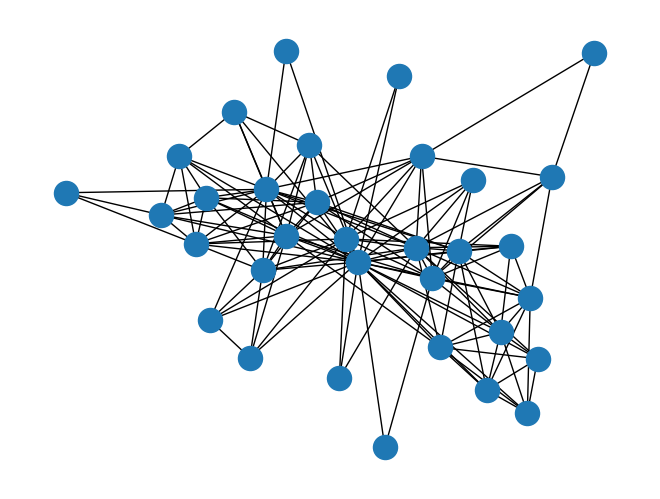

In [86]:
networkx.draw(olivertwist_network)

Let's now add labels to it:

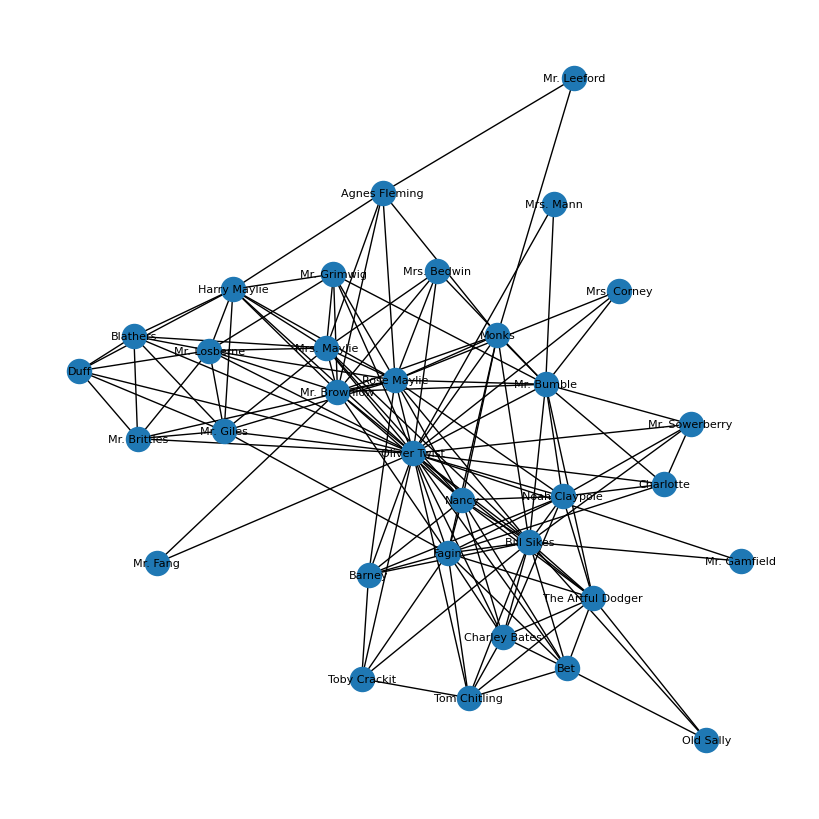

In [87]:
plt.figure(figsize=(8,8))
networkx.draw(olivertwist_network, with_labels=True, font_size=8)

With even larger novels, or even better series, you can look at potential _communities_ of characters. Once again, see the _Network of Thrones_ example for bang-on example of this! We'll try it out on Oliver Twist using the `community` functions in `networkx`:

In [88]:
from networkx.algorithms import community

In [89]:
communities = community.greedy_modularity_communities(olivertwist_network)

Look at the communities identified by the algorith:

In [90]:
communities

[frozenset({'Agnes Fleming',
            'Blathers',
            'Duff',
            'Harry Maylie',
            'Monks',
            'Mr. Brittles',
            'Mr. Brownlow',
            'Mr. Giles',
            'Mr. Grimwig',
            'Mr. Leeford',
            'Mr. Losberne',
            'Mrs. Bedwin',
            'Mrs. Maylie',
            'Rose Maylie'}),
 frozenset({'Barney',
            'Bet',
            'Bill Sikes',
            'Charley Bates',
            'Fagin',
            'Nancy',
            'Noah Claypole',
            'Old Sally',
            'The Artful Dodger',
            'Toby Crackit',
            'Tom Chitling'}),
 frozenset({'Charlotte',
            'Mr. Bumble',
            'Mr. Fang',
            'Mr. Gamfield',
            'Mr. Sowerberry',
            'Mrs. Corney',
            'Mrs. Mann',
            'Oliver Twist'})]

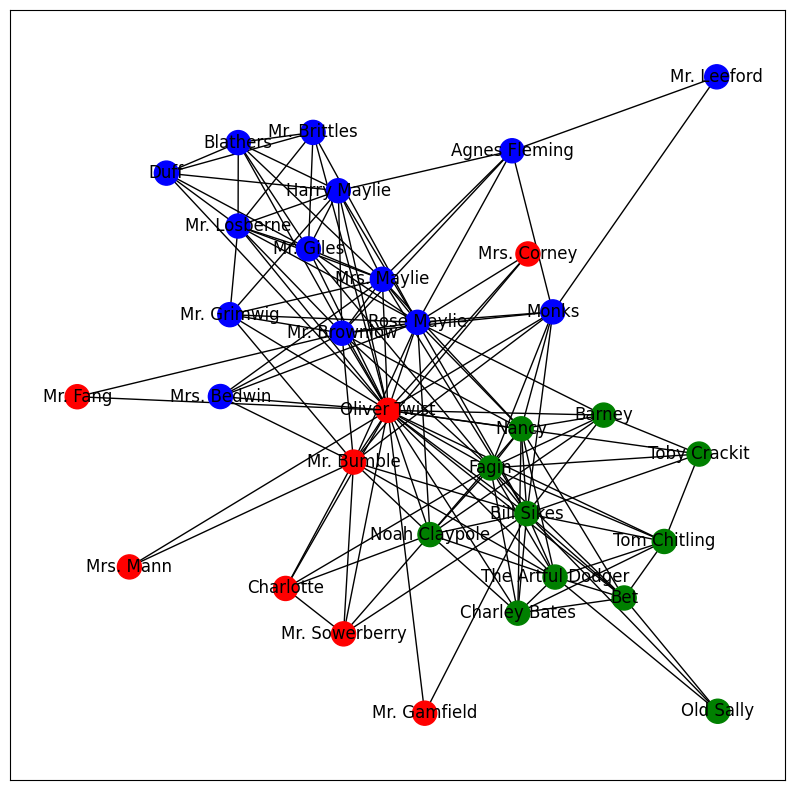

In [91]:
for n in olivertwist_network.nodes():
    if n in communities[0]:
        olivertwist_network.nodes[n]['color'] = 'b'
    elif n in communities[1]:
        olivertwist_network.nodes[n]['color'] = 'g'
    else:
        olivertwist_network.nodes[n]['color'] = 'r'

pos = networkx.spring_layout(olivertwist_network)
colors = [node[1]['color'] for node in olivertwist_network.nodes(data=True)]

plt.figure(figsize=(10,10))
networkx.draw_networkx(olivertwist_network, pos, with_labels=True, node_color=colors)
plt.show()

Finally, let's see which characters have the highest number of connections in the network using `degree`:

In [92]:
degrees = dict(networkx.degree(olivertwist_network))
networkx.set_node_attributes(olivertwist_network, name='degree', values=degrees)

And let's look at the scores:

In [93]:
pd.DataFrame(olivertwist_network.nodes(data='degree'), columns=['node', 'degree']).sort_values(by='degree',ascending=False)

node  degree
0        Oliver Twist      29
9         Rose Maylie      17
3          Bill Sikes      17
11              Fagin      14
16       Mr. Brownlow      13
2          Mr. Bumble      13
17              Nancy      12
26        Mrs. Maylie      12
8       Noah Claypole      11
5   The Artful Dodger      10
28       Harry Maylie      10
24       Mr. Losberne      10
29              Monks       9
22          Mr. Giles       9
19                Bet       8
12      Charley Bates       8
20             Barney       7
25           Blathers       7
15       Tom Chitling       7
18        Mr. Grimwig       7
23       Mr. Brittles       6
27               Duff       6
30      Agnes Fleming       6
6      Mr. Sowerberry       5
14        Mrs. Bedwin       5
10       Toby Crackit       5
7           Charlotte       5
21        Mrs. Corney       3
31          Old Sally       3
13           Mr. Fang       2
1           Mrs. Mann       2
4        Mr. Gamfield       2
32        Mr. Leeford       2

And let's find out who connects the highest number of other nodes in the graph using `betweenness_centrality`:

In [94]:
betweenness_centrality = networkx.betweenness_centrality(olivertwist_network)
networkx.set_node_attributes(olivertwist_network, name='betweenness_centrality', values=betweenness_centrality)

And let's look at the scores:

In [95]:
pd.DataFrame(olivertwist_network.nodes(data='betweenness_centrality'), columns=['node', 'betweenness_centrality']).sort_values(by='betweenness_centrality',ascending=False)

node  betweenness_centrality
0        Oliver Twist                0.398529
3          Bill Sikes                0.089811
9         Rose Maylie                0.073043
29              Monks                0.055661
2          Mr. Bumble                0.045425
11              Fagin                0.038707
16       Mr. Brownlow                0.034943
26        Mrs. Maylie                0.025802
5   The Artful Dodger                0.016478
17              Nancy                0.016464
30      Agnes Fleming                0.015745
28       Harry Maylie                0.013528
8       Noah Claypole                0.011638
19                Bet                0.009473
22          Mr. Giles                0.006905
24       Mr. Losberne                0.006317
20             Barney                0.002115
15       Tom Chitling                0.001512
18        Mr. Grimwig                0.001344
25           Blathers                0.001142
12      Charley Bates                0.001075
7           Charlotte                0.000792
23       Mr. Brittles                0.000739
6      Mr. Sowerberry                0.000587
10       Toby Crackit                0.000504
14        Mrs. Bedwin                0.000336
27               Duff                0.000336
21        Mrs. Corney                0.000000
1           Mrs. Mann                0.000000
13           Mr. Fang                0.000000
4        Mr. Gamfield                0.000000
31          Old Sally                0.000000
32        Mr. Leeford                0.000000

Let's create a final df with all the information about each node, so that we can export it!

In [96]:
final_df_graph = pd.DataFrame(dict(olivertwist_network.nodes(data=True))).T
final_df_graph.to_csv('olivertwist_character_network.csv')
final_df_graph

color degree betweenness_centrality
Oliver Twist          r     29               0.398529
Mrs. Mann             r      2                    0.0
Mr. Bumble            r     13               0.045425
Bill Sikes            g     17               0.089811
Mr. Gamfield          r      2                    0.0
The Artful Dodger     g     10               0.016478
Mr. Sowerberry        r      5               0.000587
Charlotte             r      5               0.000792
Noah Claypole         g     11               0.011638
Rose Maylie           b     17               0.073043
Toby Crackit          g      5               0.000504
Fagin                 g     14               0.038707
Charley Bates         g      8               0.001075
Mr. Fang              r      2                    0.0
Mrs. Bedwin           b      5               0.000336
Tom Chitling          g      7               0.001512
Mr. Brownlow          b     13               0.034943
Nancy                 g     12               0.016464
Mr. Grimwig           b      7               0.001344
Bet                   g      8               0.009473
Barney                g      7               0.002115
Mrs. Corney           r      3                    0.0
Mr. Giles             b      9               0.006905
Mr. Brittles          b      6               0.000739
Mr. Losberne          b     10               0.006317
Blathers              b      7               0.001142
Mrs. Maylie           b     12               0.025802
Duff                  b      6               0.000336
Harry Maylie          b     10               0.013528
Monks                 b      9               0.055661
Agnes Fleming         b      6               0.015745
Old Sally             g      3                    0.0
Mr. Leeford           b      2                    0.0